In [1]:
import numpy as np
from array import array
import os
import sys
from Plot_func import Draw3HistosRes_fromhisto
from Plot_func import SetGlobalStyle
import ROOT
from ROOT import TVectorD, TMatrix, TMath, TVector3, TGraphErrors, TFile, TTree, gRandom, gPad, gROOT, gVirtualX, kTRUE, kRed, TProfile, gStyle

Welcome to JupyROOT 6.26/06


In [2]:
muon_mass = 0.1056583755 #GeV/c^2
folder = "/home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/MCgarlite/6planes/"
filetitle = "MC1GeV_aliceseed_Eloss_MS_kalman_Eloss_MS"

png = ".png"
folder+=filetitle+"/"
filename = folder+filetitle+".root"
#filename ="test.root"
#garlitetest_nosmear_perfectseed_allhits_elosscorrpred_r5_5.root

file = ROOT.TFile(filename)
t=file.Get("t1s") 

In [3]:
muon_mass = 0.1056583755 #GeV/c^2
folder = "/home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/MCgarlite/6planes/"
filetitle = "MC1GeV_realseed_Eloss_MS_kalman_Eloss_MS"

png = ".png"
folder+=filetitle+"/"
filename2 = folder+filetitle+".root"
#filename ="test.root"
#garlitetest_nosmear_perfectseed_allhits_elosscorrpred_r5_5.root

file2 = ROOT.TFile(filename2)
t2=file2.Get("t1s") 

In [4]:

hpResKendVSNPoints = ROOT.TH2D( 'h1', 'h1',10, 4, 14, 21, -0.4, 0.4)


hpResKendVSNPoints2 = ROOT.TH2D( 'h2', 'h2', 10, 4, 14, 21, -0.4, 0.4)

hpResKendVSNPoints2old = ROOT.TH2D( 'h3', 'h3', 10, 4, 14, 21, -0.4, 0.4)



In [5]:
for iev in range(t.GetEntries()):
    t.GetEntry(iev)
    if t.xyz_plane.size()!=0 :
        yMC = t.xyz_MC.Y()
        xMC = t.xyz_MC.X()
        sinphiMC = t.sinphi_MC   
        tanlambdaMC = t.tanlambda_MC
        invpTMC = t.invpT_MC
        pMC = np.sqrt(t.pxyz_MC.Mag2())
        

        if(t.status ==1):
            last_n = t.parvect_bkw.size()-1
            y = t.parvect_bkw[last_n][0]
            x = t.parvect_bkw[last_n][1]
            sinphi= t.parvect_bkw[last_n][2]
            tanlambda=t.parvect_bkw[last_n][3]
            invpT = t.parvect_bkw[last_n][4]
            p = np.abs((1/np.cos(np.arctan(t.parvect_bkw[last_n][3])))/t.parvect_bkw[last_n][4])
        else:
            y = t.xyz_seed.Y()
            x = t.xyz_seed.X()
            sinphi= t.sinphi_seed
            tanlambda=t.tanlambda_seed
            invpT = -t.curvature_seed/(0.5*0.00299792458)
            p =  np.abs((1/np.cos(np.arctan(t.tanlambda_seed)))*(0.5*0.299792458e-2)/t.curvature_seed)


        hpResKendVSNPoints.Fill(last_n +1,(p-pMC)/pMC)
        

In [6]:
for iev in range(t2.GetEntries()):
    t2.GetEntry(iev)
    if t2.xyz_plane.size()!=0 :
        yMC = t2.xyz_MC.Y()
        xMC = t2.xyz_MC.X()
        sinphiMC = t2.sinphi_MC   
        tanlambdaMC = t2.tanlambda_MC
        invpTMC = t2.invpT_MC
        pMC = np.sqrt(t2.pxyz_MC.Mag2())

        yILRM = t2.xyz_seed_old.Y()
        xILRM = t2.xyz_seed_old.X()
        sinphiILRM= t2.sinphi_seed_old
        tanlambdaILRM=t2.tanlambda_seed_old
        invpTILRM = -t2.curvature_seed_old/(0.5*0.00299792458)
        pILRM = np.abs((1/np.cos(np.arctan(tanlambdaILRM)))*(0.5*0.299792458e-2)/t2.curvature_seed_old)


        if(t2.status ==1):
            last_n = t2.parvect_bkw.size()-1
            y = t2.parvect_bkw[last_n][0]
            x = t2.parvect_bkw[last_n][1]
            sinphi= t2.parvect_bkw[last_n][2]
            tanlambda=t2.parvect_bkw[last_n][3]
            invpT = t2.parvect_bkw[last_n][4]
            p = np.abs((1/np.cos(np.arctan(t2.parvect_bkw[last_n][3])))/t2.parvect_bkw[last_n][4])
        else:
            y = t2.xyz_seed.Y()
            x = t2.xyz_seed.X()
            sinphi= t2.sinphi_seed
            tanlambda=t2.tanlambda_seed
            invpT = -t2.curvature_seed/(0.5*0.00299792458)
            p =  np.abs((1/np.cos(np.arctan(t2.tanlambda_seed)))*(0.5*0.299792458e-2)/t2.curvature_seed)


        hpResKendVSNPoints2.Fill(last_n +1,(p-pMC)/pMC)

        hpResKendVSNPoints2old.Fill(last_n +1,(pILRM-pMC)/pMC)

### p Residuals VS Length

Warning in <TCanvas::Constructor>: Deleting canvas with same name: cc
Info in <TH2D::DoFitSlices>: Slice fit 0 (3.000000,4.000000)
Info in <TH2D::DoFitSlices>: Slice fit 1 (4.000000,5.000000)
Info in <TH2D::DoFitSlices>: Slice fit 2 (5.000000,6.000000)
Info in <TH2D::DoFitSlices>: Slice fit 3 (6.000000,7.000000)
Info in <TH2D::DoFitSlices>: Slice fit 4 (7.000000,8.000000)
Info in <TH2D::DoFitSlices>: Slice fit 5 (8.000000,9.000000)
Info in <TH2D::DoFitSlices>: Slice fit 6 (9.000000,10.000000)
Info in <TH2D::DoFitSlices>: Slice fit 7 (10.000000,11.000000)
Info in <TH2D::DoFitSlices>: Slice fit 8 (11.000000,12.000000)
Info in <TH2D::DoFitSlices>: Slice fit 9 (12.000000,13.000000)
Info in <TH2D::DoFitSlices>: Slice fit 10 (13.000000,14.000000)
Info in <TH2D::DoFitSlices>: Slice fit 11 (14.000000,15.000000)
Info in <TH2D::DoFitSlices>: Slice fit 0 (3.000000,4.000000)
Info in <TH2D::DoFitSlices>: Slice fit 1 (4.000000,5.000000)
Info in <TH2D::DoFitSlices>: Slice fit 2 (5.000000,6.000000)
In

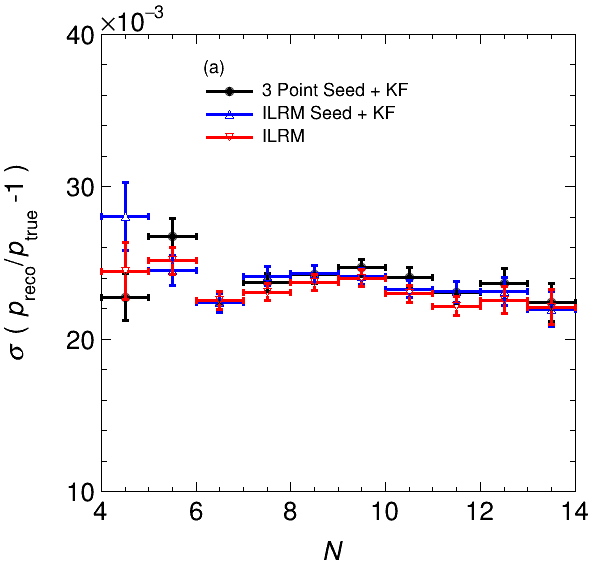

In [9]:
SetGlobalStyle()

Xname = "#it{N}"
yrangeuser = [0.01,0.04]

cc=ROOT.TCanvas("cc","",600,600)
lg = ROOT.TLegend(0.33, 0.74, 0.94, 0.9)

Draw3HistosRes_fromhisto(hpResKendVSNPoints,hpResKendVSNPoints2,hpResKendVSNPoints2old,"h1","h2","h3",Xname,cc,lg,"3 Point Seed + KF", "ILRM Seed + KF ", "ILRM", yrangeuser,2)
lg.Draw()
cc.Draw()
cc.Print(folder+"RespVSN.eps")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: cc
Info in <TH2D::DoFitSlices>: Slice fit 0 (3.000000,4.000000)
Info in <TH2D::DoFitSlices>: Slice fit 1 (4.000000,5.000000)
Info in <TH2D::DoFitSlices>: Slice fit 2 (5.000000,6.000000)
Info in <TH2D::DoFitSlices>: Slice fit 3 (6.000000,7.000000)
Info in <TH2D::DoFitSlices>: Slice fit 4 (7.000000,8.000000)
Info in <TH2D::DoFitSlices>: Slice fit 5 (8.000000,9.000000)
Info in <TH2D::DoFitSlices>: Slice fit 6 (9.000000,10.000000)
Info in <TH2D::DoFitSlices>: Slice fit 7 (10.000000,11.000000)
Info in <TH2D::DoFitSlices>: Slice fit 8 (11.000000,12.000000)
Info in <TH2D::DoFitSlices>: Slice fit 9 (12.000000,13.000000)
Info in <TH2D::DoFitSlices>: Slice fit 10 (13.000000,14.000000)
Info in <TH2D::DoFitSlices>: Slice fit 11 (14.000000,15.000000)
Info in <TH2D::DoFitSlices>: Slice fit 0 (3.000000,4.000000)
Info in <TH2D::DoFitSlices>: Slice fit 1 (4.000000,5.000000)
Info in <TH2D::DoFitSlices>: Slice fit 2 (5.000000,6.000000)
In

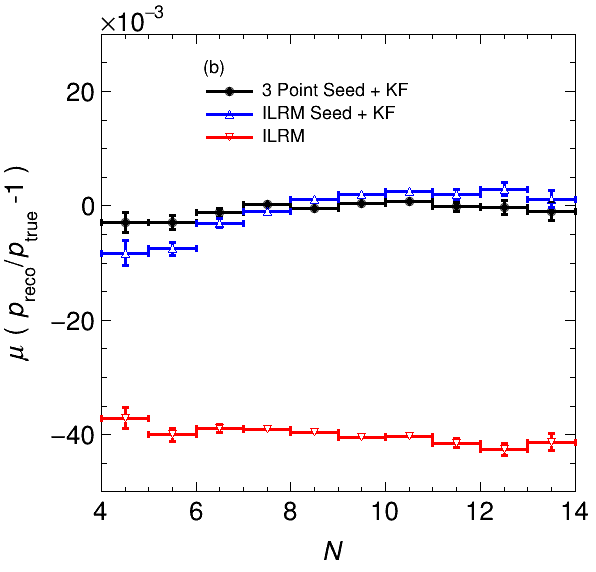

In [10]:
Xname = "#it{N}"
yrangeuser = [-0.05,0.03]

cc=ROOT.TCanvas("cc","",600,600)
lg = ROOT.TLegend(0.33, 0.74, 0.94, 0.9)

Draw3HistosRes_fromhisto(hpResKendVSNPoints,hpResKendVSNPoints2,hpResKendVSNPoints2old,"h1","h2","h3",Xname,cc,lg,"3 Point Seed + KF", "ILRM Seed + KF ", "ILRM", yrangeuser,1)
lg.Draw()
cc.Draw()
cc.Print(folder+"BiaspVSN.eps")